# Homework 4

## Author: Joshua

## Part 1: Exploratory Data Analysis

### Loading the Housing dataset into a data frame

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

* The data set contains 506 observations and 14 variables

### Data information, check of missing values and outliers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


- 1. CRIM      per capita crime rate by town
- 2. ZN        proportion of residential land zoned for lots over   25,000 sq.ft.
- 3. INDUS     proportion of non-retail business acres per town
- 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
- 5. NOX       nitric oxides concentration (parts per 10 million)
- 6. RM        average number of rooms per dwelling
- 7. AGE       proportion of owner-occupied units built prior to 1940
- 8. DIS       weighted distances to five Boston employment centres
- 9. RAD       index of accessibility to radial highways
- 10. TAX      full-value property-tax rate per $10,000
- 11. PTRATIO  pupil-teacher ratio by town

- 12. B $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks 
                 by town
                 
- 13. LSTAT    % lower status of the population
- 14. MEDV     Median value of owner-occupied homes in $1000s



In [5]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


* The data set contains zero missing values

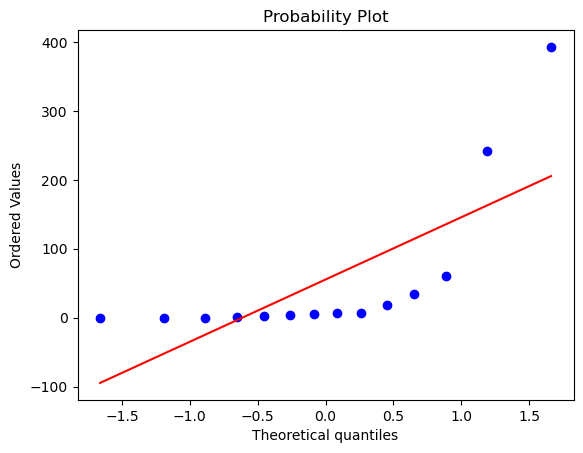

In [6]:
import pylab
import scipy.stats as stats
stats.probplot(df.iloc[2], dist="norm", plot=pylab)
plt.savefig('plot1.png', dpi=300)
pylab.show()

C:\Users\jmuzei2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


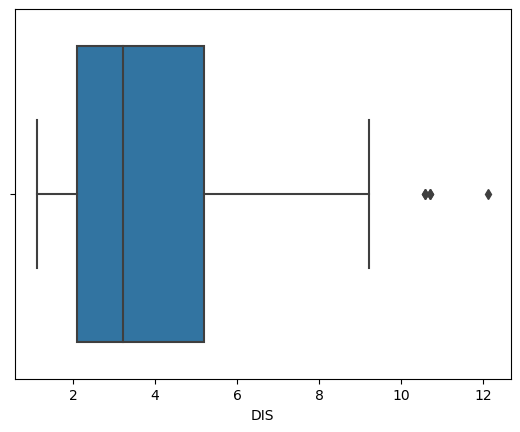

In [7]:
# Box Plot
import seaborn as sns
sns.boxplot(df['DIS'])
plt.savefig('plot2.png', dpi=300)

* From the Q-Q plt and the box-plot, three observations are outliers and need to be investigated.

In [8]:
# Data summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* From the summary we can spot some outliers. For instance, the mean of CRIM is 3.61 and the maximaum is 88.97.

### Visualizing the important characteristics of the data set

C:\Users\jmuzei2\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


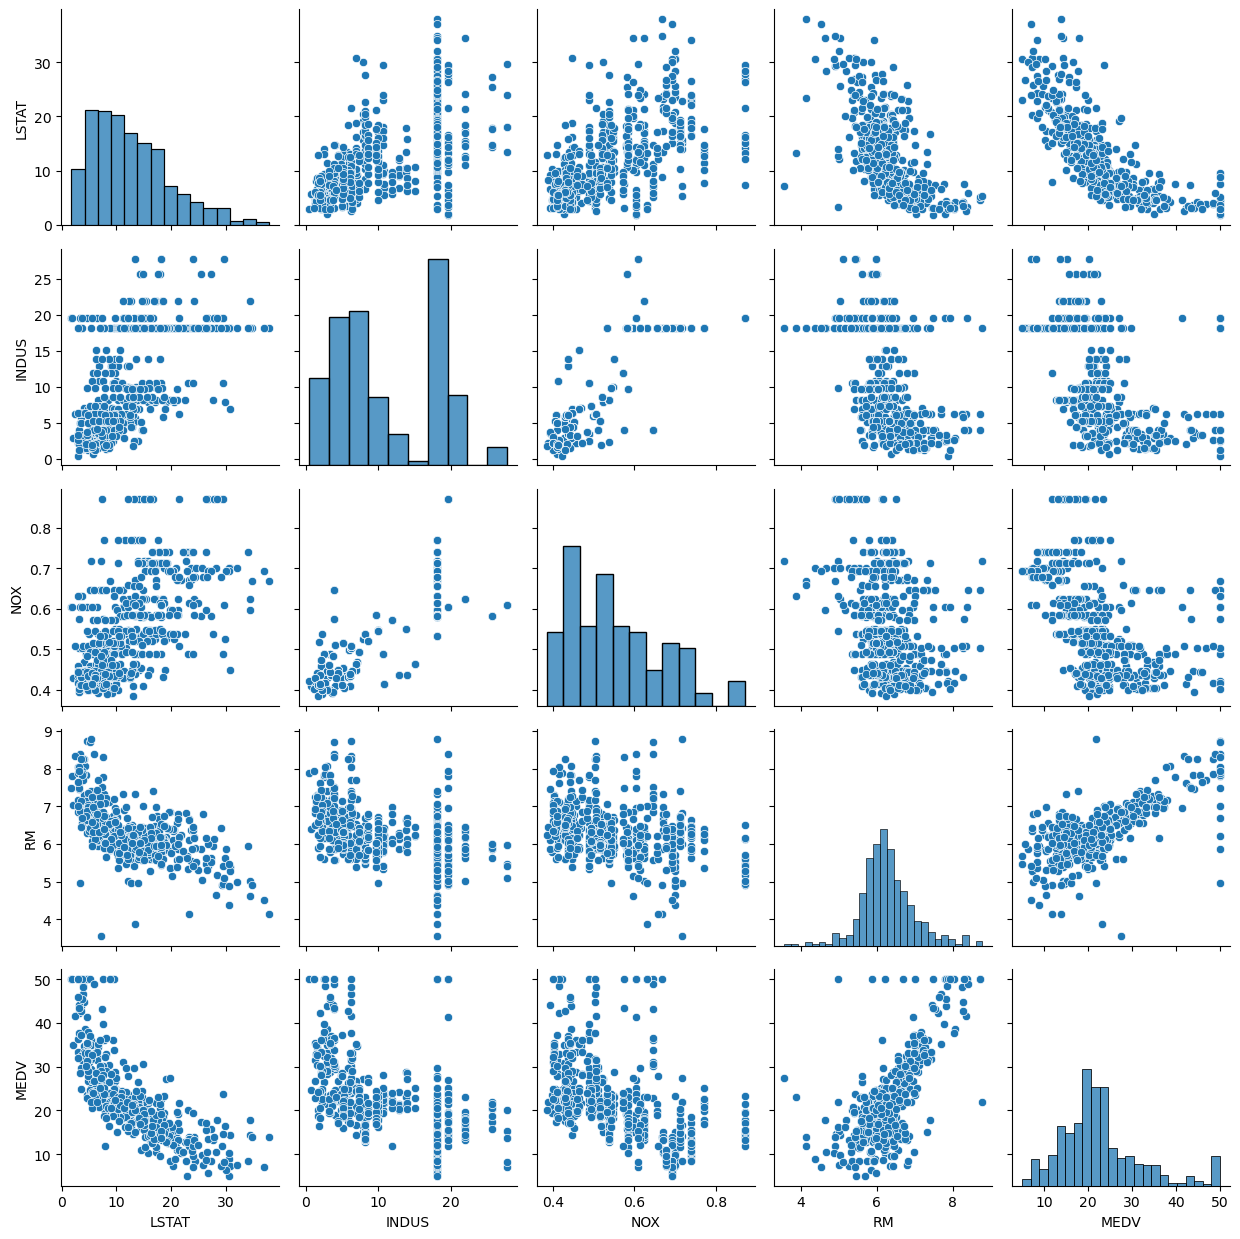

<Figure size 640x480 with 0 Axes>

In [9]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()
plt.savefig('plot3.png', dpi=300)

### Looking at relationships using correlation matrix

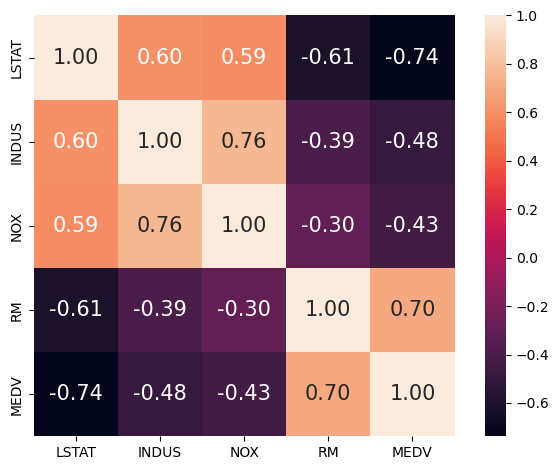

<Figure size 640x480 with 0 Axes>

In [10]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()
plt.savefig('plot4.png', dpi=300)

* The correlation matrix shows that our target variable has the highest correlation with LSTAT
* The relationship between NOX and MEDV may be non-linear
* The correlation between RM and MEDV is relatively high (0.70)

### Split data into training and test sets.  Use random_state = 42. Use 80% of the data for the training set.  Use the same split for all models.


In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Part 2: Linear regression

### Fit a linear model using SKlearn to all of the features of the dataset.  

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
mlr = LinearRegression()

mlr.fit(X_train, y_train)
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

### Describe the model (coefficients and y intercept)

In [14]:
mlr.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

* one unit increase in per capita crime rate by town (CRIM) leads to $0.113*1000$ decrease in the Median value of owner-occupied homes

* one unit increase in proportion of residential land zoned for lots over 25,000 sq.ft (ZN) leads to $0.03*1000$ increase in the Median value of owner-occupied homes.

* The intepretation of coefficients is similar whether the coefficient is positive of negative.

In [15]:
mlr.intercept_

30.246750993923946

* When the values of all variables are zero, then the Median value of owner-occupied home is $30.24* 1000$

### plot the residual errors

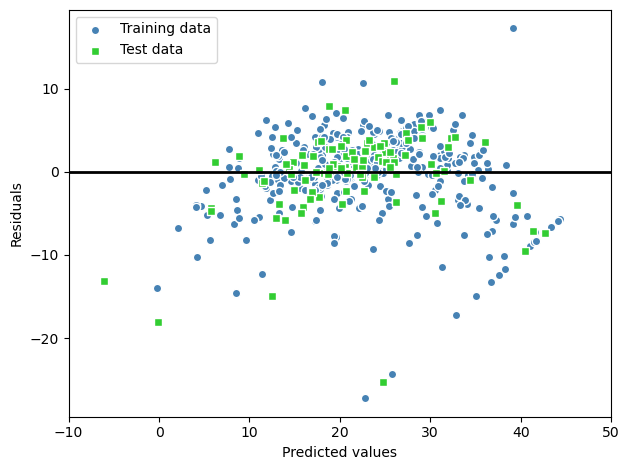

<Figure size 640x480 with 0 Axes>

In [16]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()
plt.savefig('plot5.png', dpi=300)

### Calculate performance metrics: MSE and R2.  

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21.641, test: 24.291
R^2 train: 0.751, test: 0.669


## Part 3.1: Ridge regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [19]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
ridge_model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
ridge_model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(ridge_model.alpha_)


0.55


* The lambda value that minimizes the train MSE turns out to be 0.55

### Describe the model (coefficients and y intercept)

In [20]:
ridge_model.coef_

array([-1.10389438e-01,  3.15728371e-02,  1.77675206e-02,  2.63174860e+00,
       -1.19319991e+01,  4.46195923e+00, -1.04018697e-02, -1.37269140e+00,
        2.52852975e-01, -1.12066575e-02, -8.55320919e-01,  1.25526623e-02,
       -5.18627246e-01])

* one unit increase in per capita crime rate by town (CRIM) leads to $0.103*1000$ decrease in the Median value of owner-occupied homes

* one unit increase in proportion of residential land zoned for lots over 25,000 sq.ft (ZN) leads to $0.031*1000$ increase in the Median value of owner-occupied homes.

* The intepretation of coefficients is similar whether the coefficient is positive of negative.

In [21]:
ridge_model.intercept_

26.663457390140564

* When the values of all variables are zero, then the Median value of owner-occupied home is $26.66* 1000$

### plot the residual errors

In [22]:
y_train_pred_r = ridge_model.predict(X_train)
y_test_pred_r = ridge_model.predict(X_test)

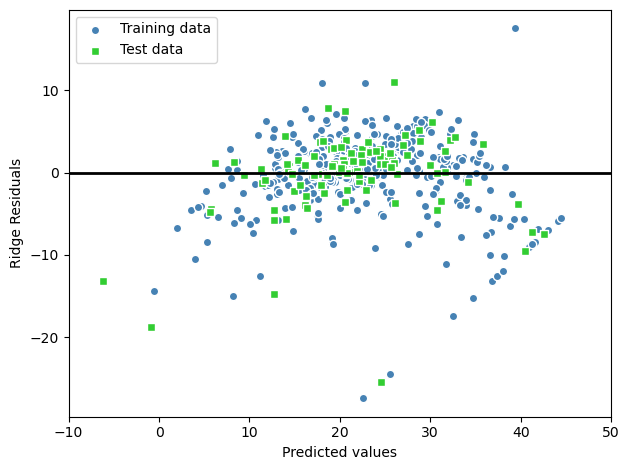

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(y_train_pred_r,  y_train_pred_r - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred_r,  y_test_pred_r - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Ridge Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()
plt.savefig('plot6.png', dpi=300)

### Calculate performance metrics for Ridge Regressiom: MSE and R2.

In [24]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_r),
        mean_squared_error(y_test, y_test_pred_r)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_r),
        r2_score(y_test, y_test_pred_r)))

MSE train: 21.728, test: 24.388
R^2 train: 0.750, test: 0.667


## Part 3.2: Lasso regression

In [25]:
from sklearn.linear_model import LassoCV

In [26]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
lasso_model = LassoCV(alphas=np.arange(0.01, 1, 0.01), cv=cv, n_jobs=-1)
#model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
lasso_model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(lasso_model.alpha_)

0.01


* The lambda value that minimizes the train MSE turns out to be 0.01

### Describe the model (coefficients and y intercept)

In [27]:
lasso_model.coef_

array([-1.11311800e-01,  3.09610605e-02,  2.60617482e-02,  2.57076499e+00,
       -1.38392323e+01,  4.43831668e+00, -8.49500066e-03, -1.39603234e+00,
        2.56384236e-01, -1.09964721e-02, -8.77833191e-01,  1.24841641e-02,
       -5.16627679e-01])

* one unit increase in per capita crime rate by town (CRIM) leads to $0.111*1000$ decrease in the Median value of owner-occupied homes

* one unit increase in proportion of residential land zoned for lots over 25,000 sq.ft (ZN) leads to $0.0309*1000$ increase in the Median value of owner-occupied homes.

* The intepretation of coefficients is similar whether the coefficient is positive of negative.

In [28]:
lasso_model.intercept_

28.049877092278955

* When the values of all variables are zero, then the Median value of owner-occupied home is $28.049* 1000$

### plot the residual errors

In [29]:
y_train_pred_l = lasso_model.predict(X_train)
y_test_pred_l = lasso_model.predict(X_test)

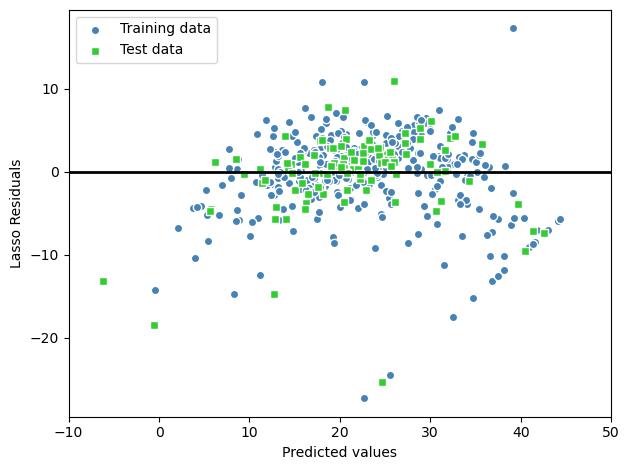

<Figure size 640x480 with 0 Axes>

In [30]:
plt.scatter(y_train_pred_l,  y_train_pred_l - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred_l,  y_test_pred_l - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Lasso Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()
plt.savefig('plot7.png', dpi=300)

### Calculate performance metrics for Lasso Regressiom: MSE and R2.

In [31]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred_l),
        mean_squared_error(y_test, y_test_pred_l)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred_l),
        r2_score(y_test, y_test_pred_l)))

MSE train: 21.678, test: 24.303
R^2 train: 0.750, test: 0.669


## Part 4: Conclusions

The Exploratory Data Analysis reveals that the data contains 506 observations and 14 variables. The target variable is MEDV which is the Median value of owner-occupied homes in $1000s. The data set does not contain missing values. The descriptive statistics, the Q-Q plot and and box-plot show that the data contains some outliers. For simplicity, the outliers have been ignored and maintained in the data set. The correlation and heatmaps shows that the target variable has the highest correlation with LSTAT.The relationship between NOX and MEDV may be non-linear. The correlation between RM and MEDV is relatively high (0.70). 
The MSE of the train data set for the three models are almost the same. That of the test data is lower (24.291) for the regression model compared to the rigde (24.388) and lasso regression (24.303). **Thus the best model is the multiple regression model** 


In [32]:
print("My name is {Joshua Muzei}")
print("My NetID is: {jmuzei2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Joshua Muzei}
My NetID is: {jmuzei2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
